In [7]:
import subprocess
from datetime import datetime

import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 自定义参数
root_path = "/Volumes/Photos/摄影"
exclude_path = ['2023-9-30-满洲里日出']
include_path = ['2024-9-28-里斯本', '2024-9-29-奥斯陆', '2024-9-30-特罗姆瑟', '2024-10-1-塞尼亚岛', '2024-10-2-雷纳', '2024-10-3-夜景极光', '2024-10-4-朗伊尔城', '2024-10-5-北极']
# raw file naming pattern
file_pattern = 'G_S*.ARW'
# whether to exclude continue shooting
exclude_continue_shooting = True

In [14]:
# get focal length for each file
def parse_focal_length(f_path):
    try:
        result = subprocess.run(['exiftool', '-FocalLengthIn35mmFormat', f_path], capture_output=True, text=True)
        return int(result.stdout.split(': ')[1].split(' mm')[0])
    except:
        print(f'parse focal length failed for {f_path}')
        return 0

# get shooting time for each file, return timestamp
def parse_shooting_time(f_path):
    try:
        result = subprocess.run(['exiftool', '-CreateDate', f_path], capture_output=True, text=True)
        data_str = result.stdout.strip().split('\n')[0].split(': ')[1]
        return int(datetime.strptime(data_str, '%Y:%m:%d %H:%M:%S').timestamp())
    except:
        print(f'parse create date failed for {f_path}')
        return 0

def get_target_files(root_path):
    result = []
    if len(include_path) > 0:
        for i_path in include_path:
            result.extend(subprocess.run(['find', os.path.join(root_path, i_path), '-name', file_pattern, '-type', 'f'], capture_output=True, text=True).stdout.strip().split('\n'))
    else:
        result = subprocess.run(['find', root_path, '-name', file_pattern, '-type', 'f'], capture_output=True, text=True).stdout.strip().split('\n')
    return result

def file_exclude(f_path):
    if len(include_path) > 0:
        return False
    for ep in exclude_path:
        if f_path.startswith(os.path.join(root_path, ep)):
            return True
    return False

In [17]:
file_list = get_target_files(root_path)
file_list

In [19]:
file_list = get_target_files(root_path)
file_list.sort()
if exclude_continue_shooting:
    shooting_times = [parse_shooting_time(f) for f in file_list]
    mask = [False if abs(shooting_times[i] - shooting_times[i+1]) <= 1 else True for i in range(len(shooting_times) - 1)]
    mask.append(1)
    file_list = [f for i, f in enumerate(file_list) if mask[i]]


In [20]:
input_focal_data = [parse_focal_length(f) for f in file_list if not file_exclude(f)]

In [21]:
len(input_focal_data)

1024

<Axes: ylabel='Density'>

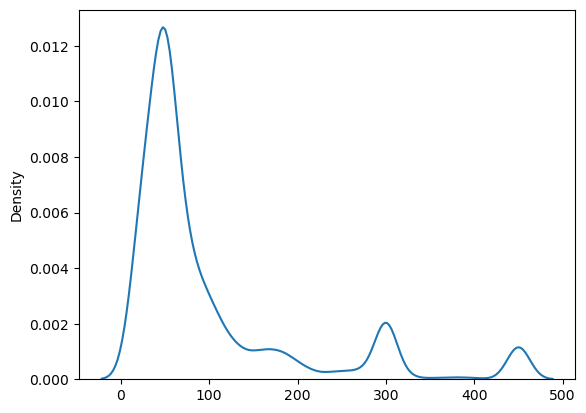

In [22]:
# plot  histogram of focal length
sns.kdeplot(input_focal_data, bw_adjust=0.5)

(array([ 62.,  45.,  41.,  60.,  42.,  29., 219.,  31.,  39.,  31.,  36.,
         34.,  16.,  15.,  24.,  17.,  16.,  13.,  11.,  15.,   5.,   5.,
         10.,   6.,   5.,   2.,   8.,   4.,   6.,   7.,   4.,   6.,   2.,
          9.,   6.,   2.,   5.,   3.,   2.,   1.,   2.,   1.,   0.,   1.,
          1.,   3.,   1.,   2.,   1.,   1.,   5.,   1.,   0.,   0.,   1.,
          1.,  64.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  38.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 17.,  22.,  27.,  32.,  37.,  42.,  47.,  52.,  57.,  62.,  67.,
         72.,  77.,  82.,  87.,  92.,  97., 102., 107., 112., 117., 122.,
        127., 132., 137., 142., 147., 152., 157., 162., 167., 172., 177.,
        182., 187., 192., 197., 202., 207., 212., 217., 222., 227., 232.,
        237., 242., 247., 252., 257., 262., 267., 272.

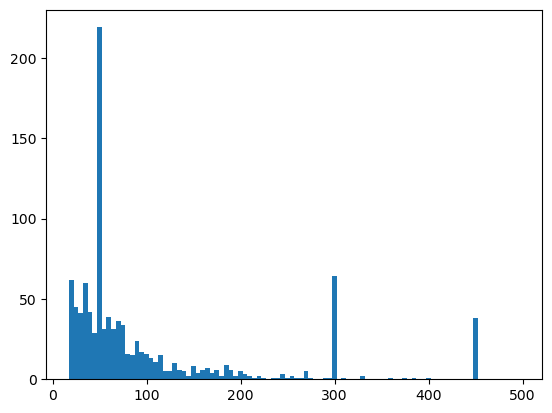

In [23]:
plt.hist(input_focal_data, bins=range(max(min(input_focal_data), 0), max(input_focal_data) + 50, 5))